In [207]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Dataset IV

In [208]:
# dataset 4
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y - 1
y.shape

(200,)

In [209]:
np.random.seed(777)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)
lam = 0.01
x = np.random.randn(n, 2)
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

In [210]:
num_iter = 100
alpha = 1
lam = 0.01
# lip = 0.25 * max(x[:,0]**2)

# Gradient Descent

In [211]:
loss_hist_batch_steepest_gradient = []
w = np.zeros_like(x[0])
w.shape

(2,)

In [212]:

for t in range(num_iter):
    expo = 1 + np.exp(-y * (x @ w))
    posterior = 1 / expo
    res = ((1 - posterior) * y * x.T).T
    grad =  -1 / n * np.sum(res, axis=0) + 2 * lam * w

    direction = -grad
    
    loss = 1 / n  * np.sum(np.log(expo)) + lam * (w.T @ w)
    # print(loss.shape)
    loss_hist_batch_steepest_gradient.append(loss)
    # ww = ww + alpha * 1.0 / np.sqrt(t) / lip * direction
    w = w + alpha * direction


In [213]:
print(min(loss_hist_batch_steepest_gradient))

0.47822277182053474


Text(0, 0.5, 'loss')

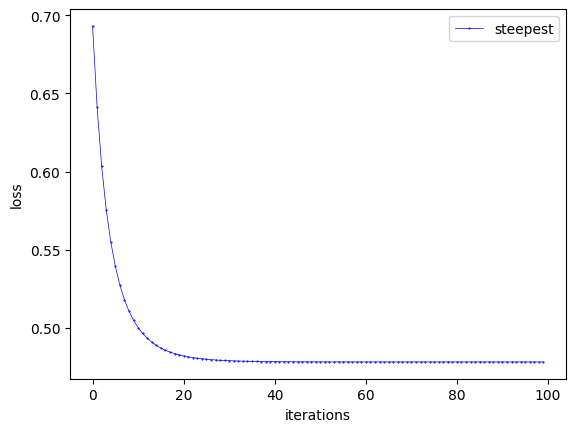

In [214]:
plt.plot(loss_hist_batch_steepest_gradient, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')

# Newton's Method

In [215]:
loss_hist_newton = []
w = np.zeros_like(x[0])
w.shape

(2,)

In [216]:
for t in range(num_iter):
    expo = 1 + np.exp(-y * (x @ w))
    posterior = 1 / expo
    res = ((1 - posterior) * y * x.T).T
    grad =  -1 / n * np.sum(res, axis=0) + 2 * lam * w

    s = np.diag(posterior * (1 - posterior))
    hess = 1 / n * (x.T @ s @ x) + 2 * lam * np.eye(w.shape[0])
    # if t < 5:
    #     print(hess.shape, hess)
    direction = -np.linalg.inv(hess) @ grad

    loss = 1 / n  * np.sum(np.log(expo)) + lam * (w.T @ w)
    loss_hist_newton.append(loss)
    w = w + alpha * direction
    # print(w.shape)

In [217]:
# loss_hist_newton[:5]
print(min(loss_hist_newton))

0.4782227446281792


Text(0, 0.5, 'loss')

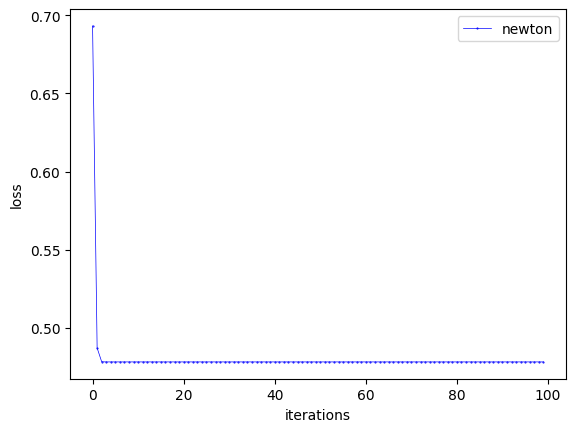

In [218]:
plt.plot(loss_hist_newton, 'bo-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')

min_loss 0.4782227446281792


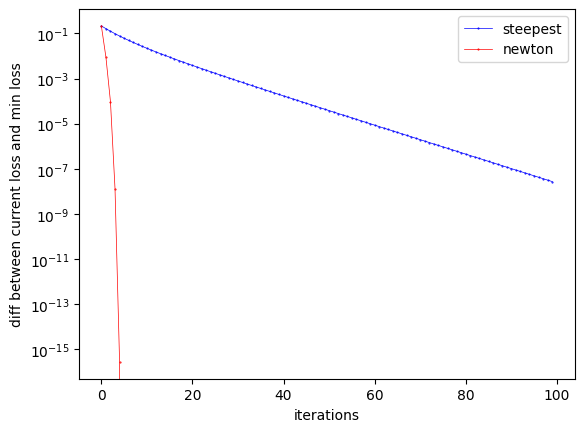

In [219]:
min_loss = min(min(loss_hist_batch_steepest_gradient), min(loss_hist_newton))
print('min_loss', min_loss)
plt.plot(np.abs(loss_hist_batch_steepest_gradient - min_loss), 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(np.abs(loss_hist_newton - min_loss), 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('diff between current loss and min loss')
plt.show()

# EXAMPLE

In [220]:
# # prepare dataset
# np.random.seed(777)
# n = 40
# omega = np.random.randn()
# noise = 0.8 * np.random.randn(n)
# lam = 0.01
# x = np.random.randn(n, 2)
# y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

# plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
# plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')
# plt.xlabel('x')
# plt.ylabel('y')

In [221]:
# # newton
# ll_n_history = np.zeros(num_iter)
# ww_n_history = np.zeros(num_iter)
# ww = 3

# for t in range(num_iter):
#     posterior = 1 / (1 + np.exp(-y * (ww * x[:,0] + x[:,1])))
    
#     grad = 1 / n * np.sum((1 - posterior) * (-y) * x[:,0]) + 2 * lam * ww
#     hess = 1 / n * np.sum(posterior * (1 - posterior) * x[:,0]**2) + 2 * lam
#     ll = 1/n  * np.sum(np.log(1.0 + np.exp(-y * (ww * x[:,0] + x[:,1])))) + lam * (ww**2 + 1)
#     ww_n_history[t] =  ww
#     ll_n_history[t] = ll
#     print(hess.shape)
#     ww = ww - grad/hess * 1.0 / np.sqrt(t+10)

# plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
# plt.legend()
# plt.xlabel('wight')
# plt.ylabel('loss')

In [222]:
# Constants
lamb = 0.01
w_0 = np.ones_like(x[0], dtype=np.double)

In [223]:
def J(w):
  res = 0
  for i in range(n):
    res += np.log(1 + np.exp(-1*y[i]*(np.dot(w, x[i]))))

  res += lamb * (np.dot(w, w))
  return res

def grad_J(w):
  res = np.zeros_like(w, dtype=np.double)

  for i in range(n):
    p_i = 1 / (1 + np.exp(-1 * y[i] * np.dot(w, x[i])))
    res += -1 * y[i] * (1-p_i) * x[i]

    res += 2*lamb*w

  return res

def hess_J(w):
  res = np.zeros((4,4))

  for i in range(n):
    p_i = 1 / (1 + np.exp(-1 * y[i] * np.dot(w, x[i])))
    res += p_i * (1-p_i) * (np.matmul(x[i], x[i].T))

  res += 2*lamb*np.identity(4)
  return res

In [224]:
def newton_method(rnds):
  w_hist = [w_0]

  for t in range(rnds):
    w = w_hist[-1]
    grad = grad_J(w)
    # if (np.allclose(grad, 0)): break

    hess = hess_J(w)
    d = -1 * np.matmul(np.linalg.inv(hess), grad)
    w_next = w + d
    w_hist.append(w_next)

  return w_hist


In [ ]:
plt.plot(loss_hist_newton, 'bo-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')